<a href="https://colab.research.google.com/github/kingcodes02/Time-Series-Forcasting/blob/main/03%20-%20Regression_for_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.framework.config import list_physical_devices
# Import TensorFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub
# print("TF version:", tf.__version__)
# print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSSS!!!!!)


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir("/content/drive/MyDrive/complete-time-series/4-Forecasting_with_regression")

In [4]:
ls data

sales_data.csv


In [5]:
df = pd.read_csv('./data/sales_data.csv')

In [6]:
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   72 non-null     object 
 1   Sales   72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


Data Preprocessing

In [8]:
# convert the Years datatype to datatime
df['Years'] = pd.to_datetime(df['Years'])

In [9]:
df.dtypes

Years    datetime64[ns]
Sales           float64
dtype: object

In [11]:
df['time'] = np.arange(1, 73, 1)

In [12]:
df.head()

,Years,Sales,time
0,2001-01-01,139.7,1
1,2001-02-01,114.3,2
2,2001-03-01,101.6,3
3,2001-04-01,152.4,4
4,2001-05-01,215.9,5


In [13]:
df['month_name'] = df['Years'].dt.month_name()

In [14]:
df.head(15)

,Years,Sales,time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May
5,2001-06-01,228.6,6,June
6,2001-07-01,215.9,7,July
7,2001-08-01,190.5,8,August
8,2001-09-01,177.8,9,September
9,2001-10-01,139.7,10,October


**split the data into independent and dependent**

In [18]:
# Step-1: Split the data into train (4 years) and test (2 years)
df_train = df.head(48) # 4 years
df_test = df.loc[48:] # 2 years

In [19]:
df_train.tail()

,Years,Sales,time,month_name
43,2004-08-01,431.8,44,August
44,2004-09-01,330.2,45,September
45,2004-10-01,330.2,46,October
46,2004-11-01,304.8,47,November
47,2004-12-01,292.1,48,December


In [21]:
df_test.head()

,Years,Sales,time,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


In [23]:
x_train = df_train[['time']].values
x_train.shape

(48, 1)

In [24]:
y_train = df_train[['Sales']].values
y_train.shape

(48, 1)

In [46]:
x_test = df_test[['time']].values
y_test = df_test[['Sales']].values

# Linear Regression with Time
* Trend in the data

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model_trend = LinearRegression()
model_trend.fit(x_train, y_train)

LinearRegression()

In [27]:
y_fittedvalue = model_trend.predict(x_train)

In [51]:
y_forecast = model_trend.predict(x_test)

**confidence interval - 95% = 1.96**

CI = $\mu +- ME $

- ME = z * SE
- z = 1.96 (for 95% CI)
- SE = stanadard deviation of the error

In [59]:
# confidence interval
# mean +- Margin of error
error = y_train - y_fittedvalue
se = error.std()
ME = 1.96 * se

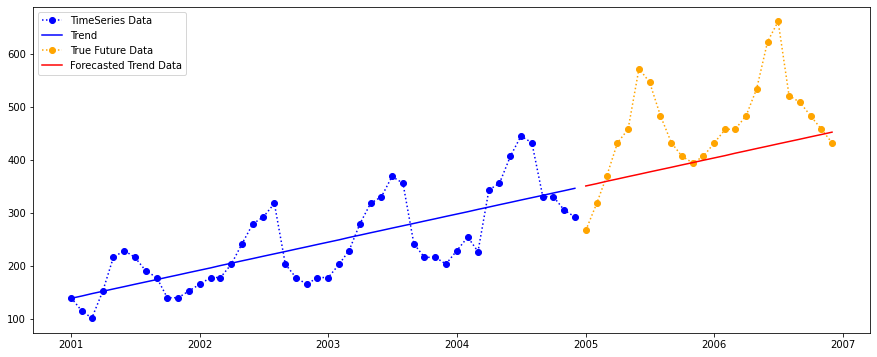

In [79]:
# visualize the data
plt.figure(figsize=(15, 6))
plt.plot(df_train['Years'], y_train, 'bo:')
plt.plot(df_train['Years'], y_fittedvalue, 'b')

# forcasted data
plt.plot(df_test['Years'], y_test, 'o:', color='orange')
plt.plot(df_test['Years'], y_forecast, 'b', color='red')

# margin of error
# ci_plus = y_forecast + ME
# ci_minus = y_forecast - ME
# plt.fill_between(df_test['Years'], (ci_plus), (ci_,inus), alpha=0.1)

plt.legend(['TimeSeries Data', 'Trend', 'True Future Data', 'Forecasted Trend Data']);

In [81]:
# 2006-01-01	431.8	61
forecast_mean = model_trend.predict(np.array([[61]]))

In [83]:
print(forecast_mean)
print((forecast_mean - ME, forecast_mean + ME))

[[403.28613765]]
(array([[291.67694148]]), array([[514.89533381]]))
